In [36]:
#Import necessary functions
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder


%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read in CSV and assign DateTime Index
df = pd.read_csv('data/Final_Motor_Vehicle_Collisions_QuBr_2018-2023_Class.csv')
df.head()

,CRASH DATE TIME,COLLISION_ID,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,CONTRIBUTING CATEGORY V1,CONTRIBUTING CATEGORY V2,SEASON,TIME OF DAY,IS RUSH HOUR
0,2018-01-01 00:00:00,3820945,BROOKLYN,11234,40.628770,-73.91825,1,0,Failure to Yield Right-of-Way,Passing or Lane Usage Improper,Sedan,Bike,Moving Violation,Moving Violation,Winter,Late Night,False
1,2018-01-01 00:48:00,3821048,BROOKLYN,11203,40.639260,-73.93777,0,0,Traffic Control Device Improper/Non-Working,Traffic Control Device Improper/Non-Working,Station Wagon/Sport Utility Vehicle,Sedan,Road Conditions,Road Conditions,Winter,Late Night,False
2,2018-01-01 01:30:00,3819375,QUEENS,11101,40.740913,-73.95226,0,0,Following Too Closely,Following Too Closely,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Moving Violation,Moving Violation,Winter,Late Night,False
3,2018-01-01 01:55:00,3821031,BROOKLYN,11226,40.652412,-73.95396,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,Sedan,Sedan,Driver Error,Driver Error,Winter,Late Night,False
4,2018-01-01 02:29:00,3820976,QUEENS,11418,40.694690,-73.83505,2,0,Other Vehicular,Following Too Closely,Station Wagon/Sport Utility Vehicle,Sedan,Third-Party (Vehicular),Moving Violation,Winter,Early Morning,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30701 entries, 0 to 30700
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE TIME                30701 non-null  object 
 1   COLLISION_ID                   30701 non-null  int64  
 2   BOROUGH                        30701 non-null  object 
 3   ZIP CODE                       30701 non-null  int64  
 4   LATITUDE                       30701 non-null  float64
 5   LONGITUDE                      30701 non-null  float64
 6   NUMBER OF PERSONS INJURED      30701 non-null  int64  
 7   NUMBER OF PERSONS KILLED       30701 non-null  int64  
 8   CONTRIBUTING FACTOR VEHICLE 1  30701 non-null  object 
 9   CONTRIBUTING FACTOR VEHICLE 2  30701 non-null  object 
 10  VEHICLE TYPE CODE 1            30701 non-null  object 
 11  VEHICLE TYPE CODE 2            30701 non-null  object 
 12  CONTRIBUTING CATEGORY V1       30701 non-null 

In [4]:
#Change column to datetime datatype
#df['CRASH DATE TIME'] = pd.to_datetime(df['CRASH DATE TIME'])

In [5]:
#Read in CSV and assign DateTime Index
#df = pd.read_csv('data/Final_Motor_Vehicle_Collisions_QuBr_2018-2023.csv', index_col='CRASH DATE TIME', parse_dates=True)
#df.head()

In [4]:
#Create copy of dataframe
df2 = df.copy()

In [5]:
#Dummy the contributing category of vehicle 1
df_dummy = pd.get_dummies(data=df2, columns=['CONTRIBUTING CATEGORY V1', 'TIME OF DAY'])


#Add the dummie variables back to the main dataframe
df_dummy=pd.concat([df2, df_dummy], axis=1)

#Drop the V1 category and dummy variables besides Driver Error
#df_dummy.drop(['CONTRIBUTING CATEGORY V1', 'Bodily Impairment', 'Environmental Factors', 'Moving Violation', 
#              'Other Distractions', 'Road Conditions', 'Third-Party (Non-Vehicular)', 'Third-Party (Vehicular)',
#              'Vehicle Defects', 'Internal Electronics Usage'], inplace=True, axis=1)

df_dummy

,CRASH DATE TIME,COLLISION_ID,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,...,TIME OF DAY_Afternoon,TIME OF DAY_Dawn,TIME OF DAY_Early AM,TIME OF DAY_Early Afternoon,TIME OF DAY_Early Morning,TIME OF DAY_Evening,TIME OF DAY_Late Morning,TIME OF DAY_Late Night,TIME OF DAY_Morning,TIME OF DAY_Night
0,2018-01-01 00:00:00,3820945,BROOKLYN,11234,40.628770,-73.918250,1,0,Failure to Yield Right-of-Way,Passing or Lane Usage Improper,...,0,0,0,0,0,0,0,1,0,0
1,2018-01-01 00:48:00,3821048,BROOKLYN,11203,40.639260,-73.937770,0,0,Traffic Control Device Improper/Non-Working,Traffic Control Device Improper/Non-Working,...,0,0,0,0,0,0,0,1,0,0
2,2018-01-01 01:30:00,3819375,QUEENS,11101,40.740913,-73.952260,0,0,Following Too Closely,Following Too Closely,...,0,0,0,0,0,0,0,1,0,0
3,2018-01-01 01:55:00,3821031,BROOKLYN,11226,40.652412,-73.953960,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,...,0,0,0,0,0,0,0,1,0,0
4,2018-01-01 02:29:00,3820976,QUEENS,11418,40.694690,-73.835050,2,0,Other Vehicular,Following Too Closely,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30696,2023-01-01 10:15:00,4594589,BROOKLYN,11207,40.678160,-73.897484,0,0,Driver Inattention/Distraction,Driver Inexperience,...,0,0,0,0,0,0,1,0,0,0
30697,2023-01-01 14:53:00,4594583,BROOKLYN,11208,40.660797,-73.871830,2,0,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,...,1,0,0,0,0,0,0,0,0,0
30698,2023-01-01 19:26:00,4594645,QUEENS,11434,40.689915,-73.777900,1,0,Passenger Distraction,Driver Inattention/Distraction,...,0,0,0,0,0,0,0,0,0,1
30699,2023-01-01 20:45:00,4594571,BROOKLYN,11209,40.622860,-74.025350,5,0,Unsafe Speed,Failure to Yield Right-of-Way,...,0,0,0,0,0,0,0,0,0,1


In [6]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30701 entries, 0 to 30700
Data columns (total 52 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   CRASH DATE TIME                                       30701 non-null  object 
 1   COLLISION_ID                                          30701 non-null  int64  
 2   BOROUGH                                               30701 non-null  object 
 3   ZIP CODE                                              30701 non-null  int64  
 4   LATITUDE                                              30701 non-null  float64
 5   LONGITUDE                                             30701 non-null  float64
 6   NUMBER OF PERSONS INJURED                             30701 non-null  int64  
 7   NUMBER OF PERSONS KILLED                              30701 non-null  int64  
 8   CONTRIBUTING FACTOR VEHICLE 1                         30

In [7]:
df_data = df_dummy[['ZIP CODE','NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED','CONTRIBUTING CATEGORY V1_Driver Error','TIME OF DAY_Night']]
df_data

,ZIP CODE,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PERSONS KILLED,CONTRIBUTING CATEGORY V1_Driver Error,TIME OF DAY_Night
0,11234,11234,1,1,0,0,0,0
1,11203,11203,0,0,0,0,0,0
2,11101,11101,0,0,0,0,0,0
3,11226,11226,0,0,0,0,1,0
4,11418,11418,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...
30696,11207,11207,0,0,0,0,1,0
30697,11208,11208,2,2,0,0,0,0
30698,11434,11434,1,1,0,0,0,1
30699,11209,11209,5,5,0,0,0,1


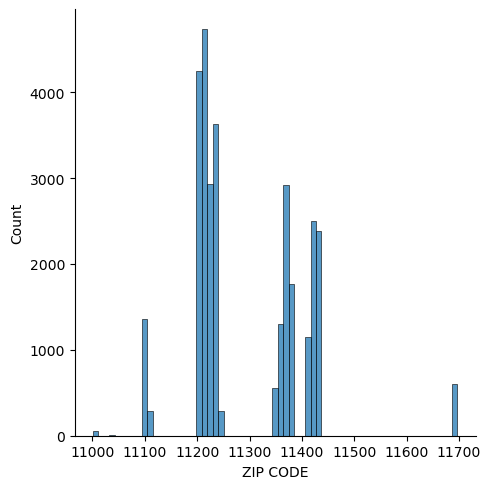

In [8]:
sns.displot(x='ZIP CODE', data=df);

In [10]:
#Count of collisions caused by driver error vs other cause
#sns.countplot(x='Driver Error', data=df_dummy);

In [11]:
#Count of collisions caused by driver error vs other cause -- broken down by borough
#sns.countplot(x='CONTRIBUTING CATEGORY V1_Driver Error', data=df_dummy, hue='BOROUGH');

In [12]:
#Count of collisions caused by driver error vs other cause -- broken down by num of ppl injured
#sns.countplot(x='Driver Error', data=df_dummy, hue='NUMBER OF PERSONS INJURED');

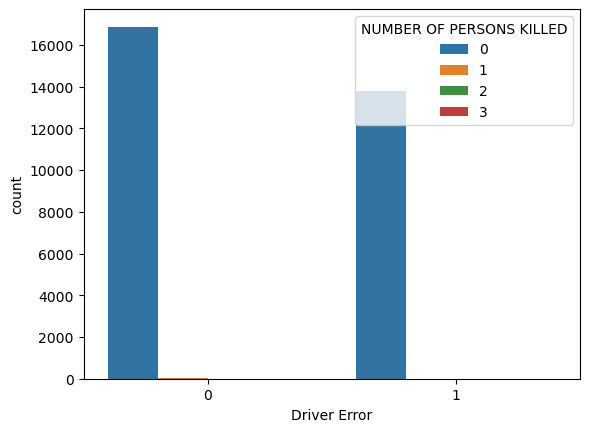

In [25]:
#Count of collisions caused by driver error vs other cause -- broken down by num of people killeda
#sns.countplot(x='Driver Error', data=df_dummy, hue='NUMBER OF PERSONS KILLED');

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30701 entries, 0 to 30700
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE TIME                30701 non-null  object 
 1   COLLISION_ID                   30701 non-null  int64  
 2   BOROUGH                        30701 non-null  object 
 3   ZIP CODE                       30701 non-null  int64  
 4   LATITUDE                       30701 non-null  float64
 5   LONGITUDE                      30701 non-null  float64
 6   NUMBER OF PERSONS INJURED      30701 non-null  int64  
 7   NUMBER OF PERSONS KILLED       30701 non-null  int64  
 8   CONTRIBUTING FACTOR VEHICLE 1  30701 non-null  object 
 9   CONTRIBUTING FACTOR VEHICLE 2  30701 non-null  object 
 10  VEHICLE TYPE CODE 1            30701 non-null  object 
 11  VEHICLE TYPE CODE 2            30701 non-null  object 
 12  CONTRIBUTING CATEGORY V1       30701 non-null 

## Train Test Split

In [14]:
df_data.head()

,ZIP CODE,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PERSONS KILLED,CONTRIBUTING CATEGORY V1_Driver Error,TIME OF DAY_Night
0,11234,11234,1,1,0,0,0,0
1,11203,11203,0,0,0,0,0,0
2,11101,11101,0,0,0,0,0,0
3,11226,11226,0,0,0,0,1,0
4,11418,11418,2,2,0,0,0,0


In [15]:
#drop duplicate columns
df_data = df_data.loc[:,~df_data.columns.duplicated()].copy()
df_data

,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING CATEGORY V1_Driver Error,TIME OF DAY_Night
0,11234,1,0,0,0
1,11203,0,0,0,0
2,11101,0,0,0,0
3,11226,0,0,1,0
4,11418,2,0,0,0
...,...,...,...,...,...
30696,11207,0,0,1,0
30697,11208,2,0,0,0
30698,11434,1,0,0,1
30699,11209,5,0,0,1


In [16]:
#Assign X and y
X = df_data.drop('CONTRIBUTING CATEGORY V1_Driver Error', axis=1)
y = df_data['CONTRIBUTING CATEGORY V1_Driver Error']

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Baseline Model
Whether or not a collision was caused by 'Driver Error' or not.

In [17]:
baseline_model = LogisticRegression()
baseline_model.fit(X_train,y_train)

LogisticRegression()

In [29]:
y_pred = baseline_model.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[3415,    0],
       [2726,    0]])

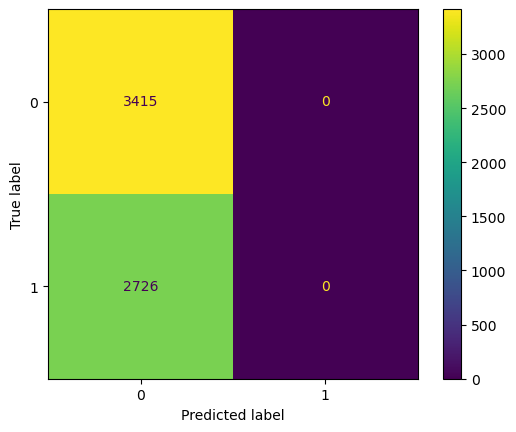

In [37]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(baseline_model, X_test, y_test);

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      1.00      0.71      3415
           1       0.00      0.00      0.00      2726

    accuracy                           0.56      6141
   macro avg       0.28      0.50      0.36      6141
weighted avg       0.31      0.56      0.40      6141



In [34]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.5560983553167237